In [13]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.3,rotation_range=60)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('train',target_size=(150,150),batch_size=16 ,class_mode='binary')
test_set = test_datagen.flow_from_directory('test',target_size=(150,150),class_mode='binary',batch_size=1)

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 32)      

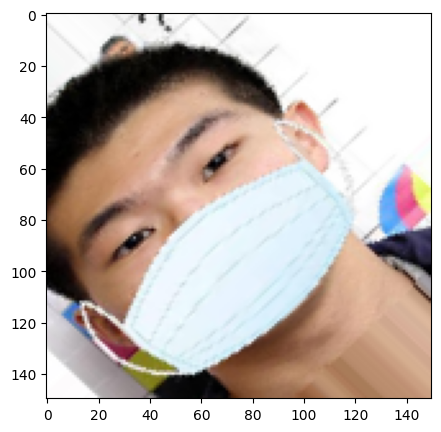

In [17]:
training_set[0][0].shape
plt.figure(figsize=(5,5))
plt.imshow(training_set[0][0][0])

In [18]:
model.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
83/83 [==============================] - 19s 218ms/step - loss: 0.6585 - accuracy: 0.5868 - val_loss: 0.3301 - val_accuracy: 0.8608
Epoch 2/10
83/83 [==============================] - 17s 205ms/step - loss: 0.3919 - accuracy: 0.8409 - val_loss: 0.2383 - val_accuracy: 0.9072
Epoch 3/10
83/83 [==============================] - 16s 197ms/step - loss: 0.3138 - accuracy: 0.8668 - val_loss: 0.1437 - val_accuracy: 0.9536
Epoch 4/10
83/83 [==============================] - 17s 204ms/step - loss: 0.2578 - accuracy: 0.8973 - val_loss: 0.0929 - val_accuracy: 0.9588
Epoch 5/10
83/83 [==============================] - 17s 204ms/step - loss: 0.2267 - accuracy: 0.9254 - val_loss: 0.1011 - val_accuracy: 0.9588
Epoch 6/10
83/83 [==============================] - 16s 197ms/step - loss: 0.1771 - accuracy: 0.9361 - val_loss: 0.0938 - val_accuracy: 0.9588
Epoch 7/10
83/83 [==============================] - 16s 196ms/step - loss: 0.1908 - accuracy: 0.9239 - val_loss: 0.1312 - val_accuracy: 0.9433

In [19]:
model.save('final_model.h5')